In [229]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential, load_model
import tensorflow as tf 
import numpy as np
import os


In [230]:
%matplotlib inline
import matplotlib 
import matplotlib.pyplot as plt 
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] =12
plt.rcParams['ytick.labelsize'] = 12


In [251]:
nbatch = 15

train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range=0.2, width_shift_range=0.2, 
                                   height_shift_range=0.2, zoom_range=0.52, horizontal_flip=False)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = r'C:\Users\abeng\OneDrive\Desktop\DIP Project\DIP Project\DIP Project\Dataset\Test'

test_dir = r'C:\Users\abeng\OneDrive\Desktop\DIP Project\DIP Project\DIP Project\Dataset\Test'

train_gen = train_datagen.flow_from_directory(train_dir, target_size=(28,28), batch_size=nbatch,
                                              classes=['1','2','3','4','5','6','7','8','9','10','20','30','40','50'
                                                      ,'60','70','80','90','100','1000'], class_mode = 'categorical')

test_gen = train_datagen.flow_from_directory(test_dir, target_size=(28,28), batch_size=nbatch,
                                              classes=['1','2','3','4','5','6','7','8','9','10','20','30','40','50'
                                                      ,'60','70','80','90','100','1000'], class_mode = 'categorical')
labels={1:'1',2:'2',3:'3',4:'4',5:'5',6:'6',7:'7',8:'8',9:'9',10:'10',11:'20',12:'30',13:'40',14:'50'
                                                      ,15:'60',16:'70',17:'80',18:'90',19:'100',20:'1000'}

Found 1464 images belonging to 20 classes.
Found 1464 images belonging to 20 classes.


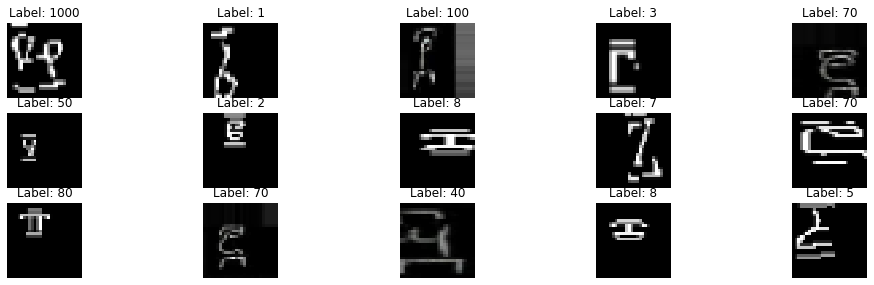

In [252]:
test_imgs,test_labels= next(test_gen)
plt.figure(figsize=(17,8))
for i in range(nbatch):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    plt.imshow(test_imgs[i])
    #print(test_labels[i])
    #plt.title('Label: %d' %(np.argmax(test_labels[i])+1))
    plt.title('Label: ' + labels[(np.argmax(test_labels[i])+1)])
    plt.savefig('Labeled_image.png')

In [233]:
test_imgs.shape

(15, 28, 28, 3)

In [234]:
train_imgs,train_labels= next(train_gen)
train_imgs.shape

(15, 28, 28, 3)

In [253]:
def build_model():
    classifier = Sequential()

    classifier.add(Convolution2D(32,(3,3),padding='same', input_shape = (28, 28, 3), activation = 'relu', data_format='channels_last'))
    classifier.add(MaxPooling2D(pool_size = (2,2)))
    classifier.add(Convolution2D(64,(3,3),padding='same', activation = 'relu', data_format='channels_last'))
    classifier.add(MaxPooling2D(pool_size = (2,2)))
    classifier.add(Flatten())
    classifier.add(Dense(128, activation = 'relu'))
    classifier.add(Dense(20, activation = 'softmax'))
    return classifier 

In [254]:
model = build_model()
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               401536    
_________________________________________________________________
dense_14 (Dense)             (None, 20)               

In [255]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [256]:
callbacks_list = [EarlyStopping(monitor='val_loss', patience=100), ModelCheckpoint(filepath='New_model.h5', monitor='val_loss',
                                                                                  save_best_only=True)]

In [257]:
history = model.fit_generator(train_gen, steps_per_epoch=100, epochs=100, validation_data = test_gen, validation_steps =28,
                                  callbacks=callbacks_list)

Epoch 1/100
100/100 [==============================] - 11s 109ms/step - loss: 2.9790 - accuracy: 0.0716 - val_loss: 2.9189 - val_accuracy: 0.0762
Epoch 2/100
100/100 [==============================] - 3s 28ms/step - loss: 2.9096 - accuracy: 0.0880 - val_loss: 2.8330 - val_accuracy: 0.1214
Epoch 3/100
100/100 [==============================] - 3s 30ms/step - loss: 2.7432 - accuracy: 0.1673 - val_loss: 2.5527 - val_accuracy: 0.1952
Epoch 4/100
100/100 [==============================] - 3s 28ms/step - loss: 2.4097 - accuracy: 0.2590 - val_loss: 2.2517 - val_accuracy: 0.3382
Epoch 5/100
100/100 [==============================] - 3s 27ms/step - loss: 2.1249 - accuracy: 0.3447 - val_loss: 1.5541 - val_accuracy: 0.3905
Epoch 6/100
100/100 [==============================] - 3s 28ms/step - loss: 1.8957 - accuracy: 0.4032 - val_loss: 1.6389 - val_accuracy: 0.4524
Epoch 7/100
100/100 [==============================] - 3s 26ms/step - loss: 1.6773 - accuracy: 0.4873 - val_loss: 2.0457 - val_accurac

100/100 [==============================] - 3s 26ms/step - loss: 0.3866 - accuracy: 0.8773 - val_loss: 0.6669 - val_accuracy: 0.8714
Epoch 58/100
100/100 [==============================] - 3s 26ms/step - loss: 0.4202 - accuracy: 0.8675 - val_loss: 0.6240 - val_accuracy: 0.8452
Epoch 59/100
100/100 [==============================] - 3s 27ms/step - loss: 0.4515 - accuracy: 0.8561 - val_loss: 0.2298 - val_accuracy: 0.8667
Epoch 60/100
100/100 [==============================] - 3s 27ms/step - loss: 0.3966 - accuracy: 0.8768 - val_loss: 0.2385 - val_accuracy: 0.8478
Epoch 61/100
100/100 [==============================] - 3s 27ms/step - loss: 0.3781 - accuracy: 0.8804 - val_loss: 0.5448 - val_accuracy: 0.8548
Epoch 62/100
100/100 [==============================] - 3s 27ms/step - loss: 0.4136 - accuracy: 0.8780 - val_loss: 0.3058 - val_accuracy: 0.9048
Epoch 63/100
100/100 [==============================] - 3s 26ms/step - loss: 0.4094 - accuracy: 0.8690 - val_loss: 0.2639 - val_accuracy: 0.879

In [194]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


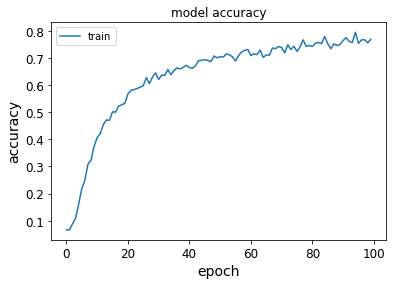

In [240]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.show()
plt.savefig('Model Accuracy.png')

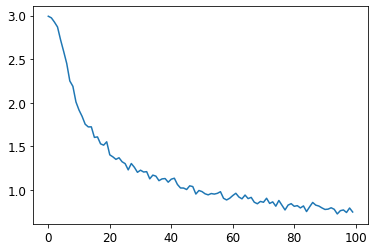

In [241]:
plt.plot(history.history['loss'])
plt.savefig('Model Loss.png')

In [242]:
print("on valid data")
pred1=model.evaluate(test_imgs,test_labels)
print("accuaracy", str(pred1[1]*100))
print("Total loss",str(pred1[0]*100))

on valid data
15/15 [==============================] - 0s 266us/step
accuaracy 100.0
Total loss 19.023369252681732


In [250]:
from keras.models import load_model
import cv2
import numpy as np

test_file = r'C:\Users\abeng\OneDrive\Desktop\DIP Project\DIP Project\DIP Project\Dataset\samples\4.png'
w= cv2.imread(test_file)
w= cv2.resize(w,(28,28))
model = load_model('New_model.h5')
w = np.reshape(w,[1,28,28,3])
result = model.predict_classes(w)
print(result+1)
print('Number: ' + labels[(result[0]+1)])
#plt.title('Label: ' + labels[(np.argmax(result+1))])

[2]
Number: 2


error: OpenCV(3.4.2) C:\Miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\imgproc\src\resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


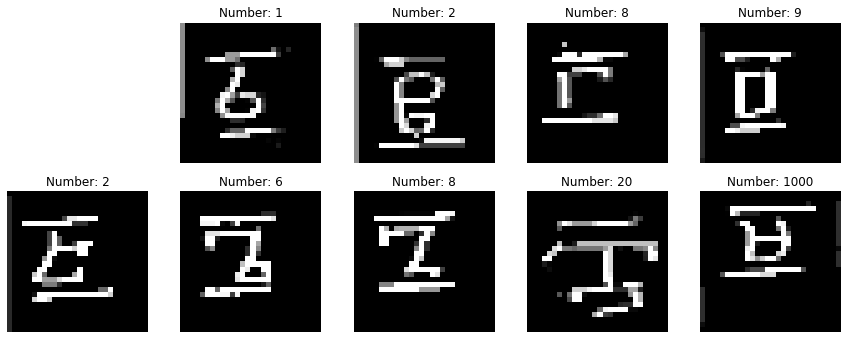

In [220]:
plt.figure(figsize=(15,15))
for i in range(1,15):
    s = str(i) + '.PNG'
    testing_files = r'C:\Users\abeng\OneDrive\Desktop\DIP Project\DIP Project\DIP Project\Dataset\samples/' 
    q = cv2.imread(testing_files+s)
    q = cv2.resize(q,(28,28))
    reshaped_q = np.reshape(q,[1,28,28,3])
    result = model.predict_classes(reshaped_q)
    plt.subplot(5,5,i+1)
    plt.axis('off')
    plt.imshow(q)
    #plt.title('Number: %d' %(result+1))
    plt.title('Number: ' + labels[(result[0]+1)])